In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd, numpy as np, re, time
import itertools
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True,font_scale = 1.5)
import warnings
warnings.filterwarnings('ignore')

# Reddit Dataset

In [4]:
df = pd.read_csv("train-balanced-sarcasm.csv")

# Data Cleaning
### Figuring out the "nan" float values that are causing issues

In [ ]:
print(len(df))

In [ ]:
print(df.isnull().any(axis = 0))

In [ ]:
features = df['comment']
labels = df['label']
print(len(features))
print(len(labels))

In [ ]:
start = time.time()

counter = 0
i_count = 0
bad_indices = []

for i,string in enumerate(features):
    try:
        if isinstance(string, float):
            counter += 1
            bad_indices.append(i_count)
    except:
        pass
    i_count += 1

print(counter)
print("i_count:", i_count)
print("bad_indices:", bad_indices)

end = time.time()
time_elapsed = end-start
print(time_elapsed, "seconds")

In [ ]:
print(len(df))

In [ ]:
for b in bad_indices:
    df = df.drop([b])
print(len(df))

In [ ]:
df.to_csv("Reddit_Dataset_Cleaned.csv")

In [23]:
df= pd.read_csv("Reddit_Dataset_Cleaned.csv")

In [24]:
features = df['comment']
labels = df['label']
print(len(features))
print(len(labels))

1010773
1010773


## EDA

In [25]:
df.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [26]:
print("Number of Comments:", len(df))

Number of Comments: 1010773


In [27]:
df.columns

Index(['Unnamed: 0', 'label', 'comment', 'author', 'subreddit', 'score', 'ups',
       'downs', 'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [28]:
print("Number of Sarcastic Comments", len(df.loc[df['label'] == 1]))
print("Number of Non-Sarcastic Comments", len(df.loc[df['label'] == 0]))

Number of Sarcastic Comments 505368
Number of Non-Sarcastic Comments 505405


Authors who commented the most?


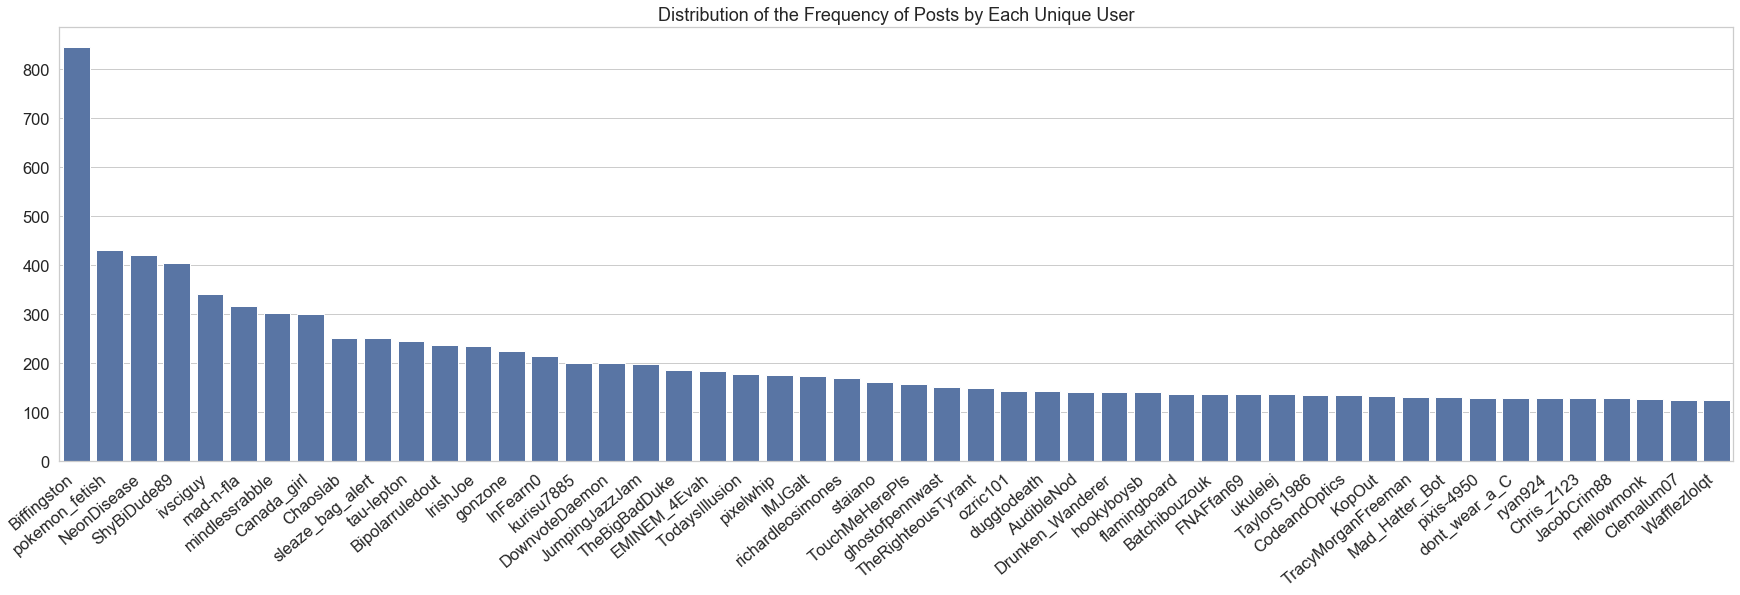

In [31]:
print("Authors who commented the most?")
plt.figure(figsize = (30,8))
star_count = df['author'].value_counts().sort_values(ascending=False)
sns.barplot(star_count.index[:50],star_count.values[:50],color='b')
plt.title("Distribution of the Frequency of Posts by Each Unique User")
plt.xticks(rotation=40,horizontalalignment='right')
plt.show()

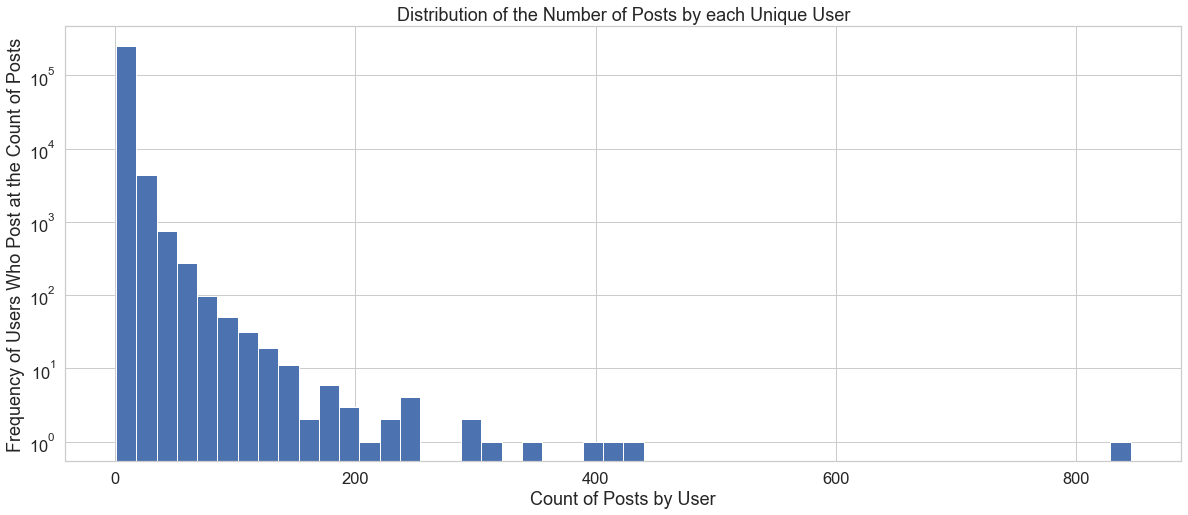

In [32]:
plt.figure(figsize = (20,8))
sns.distplot(star_count.values,kde=False,color='b', hist_kws=dict(alpha=1))
plt.title("Distribution of the Number of Posts by each Unique User")
plt.yscale('log', nonposy='clip')
plt.xlabel("Count of Posts by User")
plt.ylabel("Frequency of Users Who Post at the Count of Posts")
plt.show()

**As we can see here, there is an outliar amongst the authors of the reddit posts. One redditor in particular (username "Biffingston") posts a disproportionate amount compared the others. However, since the number of comments is exponential in comparison to the rest of the users, it shouldn't have too much of an effect.**

In [12]:
sentence_lengths = []
for i in df.comment:
    res = len(i.split()) 
    sentence_lengths.append(res)

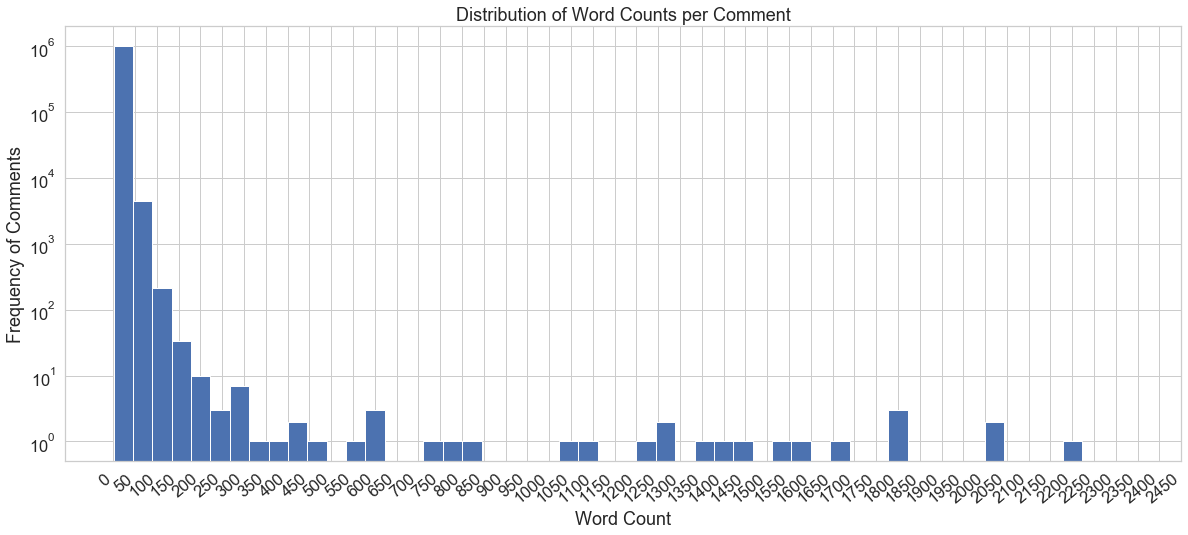

In [13]:
plt.figure(figsize = (20,8))
sns.distplot(sentence_lengths,kde=False,color='b', hist_kws=dict(alpha=1))
plt.title("Distribution of Word Counts per Comment")
plt.yscale('log', nonposy='clip')
plt.xlabel("Word Count")
plt.ylabel("Frequency of Comments")
plt.xticks(np.arange(0, 2500, 50))
plt.xticks(rotation=40,horizontalalignment='right')
plt.show()

**While comment word count outliars do exists, the vast majority of comments are less than 50 words long, as shown through the exponential nature of the histogram with around *one million* comments less than 50 words long.**

# "News Headline" Dataset

## EDA

In [14]:
# SOURCE: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection
# NOTES - Dataset is much cleaner, less spelling errors, higher modeling scores overall
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)

In [15]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,1
1,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails why congress is falling...,0
2,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggies: 9 deliciously different recipes,0
3,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...,1
4,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close to using word 'strea...,1


In [16]:
print("Number of Headlines:", len(df))

Number of Headlines: 28619


In [17]:
print(df.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [18]:
sentence_lengths = []
for i in df.headline:
    res = len(i.split())
    if res > 140:
        print(i)
    sentence_lengths.append(res)

hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet


In [19]:
print('Mean of Sentence Lengths:', np.mean(sentence_lengths))

Mean of Sentence Lengths: 10.049966805269227


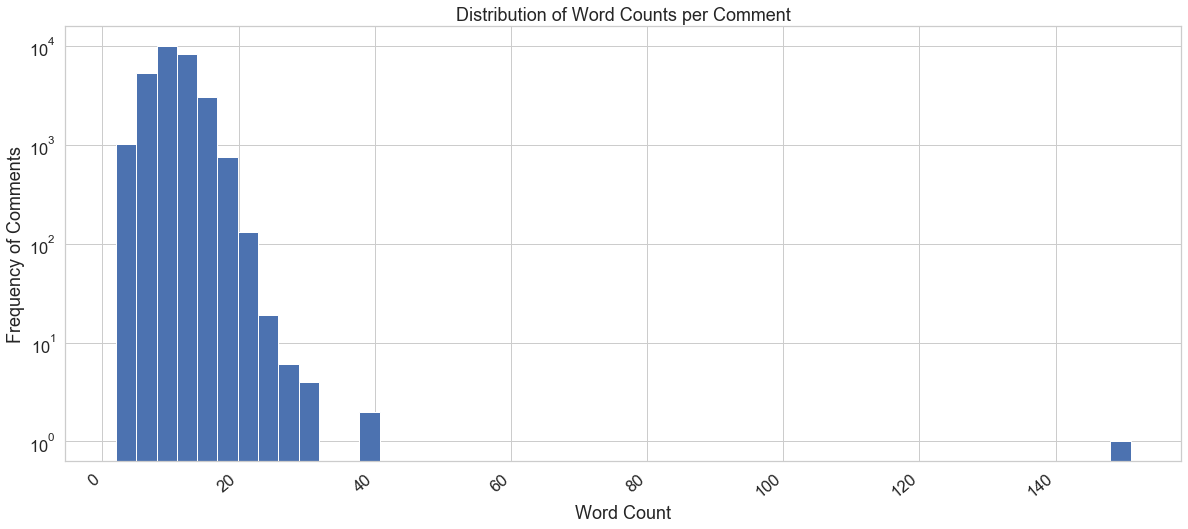

In [20]:
plt.figure(figsize = (20,8))
sns.distplot(sentence_lengths,kde=False,color='b', hist_kws=dict(alpha=1))
plt.title("Distribution of Word Counts per Comment")
plt.yscale('log', nonposy='clip')
plt.xlabel("Word Count")
plt.ylabel("Frequency of Comments")
# plt.xticks(np.arange(0, 2500, 50))
plt.xticks(rotation=40,horizontalalignment='right')
plt.show()

**There's nothing too surprising here, except that one of the headlines is really long (shown right below here). Most of the headlines are less than 20 words long, with an average headline length of around 10 words.**

In [21]:
sentence_lengths = []
for i in df.headline:
    res = len(i.split())
    if res > 140:
        print('**Here\'s the really long sentence!:**','\n',i)
    sentence_lengths.append(res)

**Here's the really long sentence!:** 
 hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet
